# Feature importance based on Minimum Redundancy Maximum Relevance (MRMR) and Extra Tree (ET) criteria

This file will identify the most important 20 features (i.e. questions) in the DASS-42 (Depression Anxiety and Stress Scale-42). 

Feature selection is done to select the questions that were best to predict whether participants’ final anxiety scores were at the low or high class.

# 1. Feature selection based on Minimum Redundancy Maximum Relevance (MRMR) criteria
Firstly, import the necessary libraries and define constants.

In [30]:
# Import libraries
import os
import pymrmr
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [31]:
# Define data folder
data_folder = "./data"
show_top = 20

Using the one-hot encoded features dataset, print the minimum number (20) of useful features using mRMR. 

To see all of the features and their corresponding mRMR scores: Run Jupyter Notebook through a CLI (Anaconda Prompt for Windows or your built-in command line applications for MacOS or Linux).

In [32]:
# One-hot encoded dataset
train_feats = pd.read_csv(os.path.join(data_folder, "features.csv"))
train_feats = train_feats.drop(["age_norm", "gender_m", "gender_f", "region_other", "region_east", "region_west"], axis=1)  # Comment this line to include demographics

print("Processed dataset:")
print(pymrmr.mRMR(train_feats, 'MIQ', show_top))

Processed dataset:
['Q11A_0', 'Q2A_1', 'Q1A_1', 'Q15A_1', 'Q12A_2', 'Q25A_0', 'Q6A_0', 'Q35A_0', 'Q11A_2', 'Q29A_3', 'Q24A_2', 'Q39A_2', 'Q21A_1', 'Q30A_0', 'Q27A_0', 'Q13A_0', 'Q1A_2', 'Q14A_3', 'Q18A_0', 'Q29A_0']


Using the not one-hot encoded dataset, print the minimum number (20) of useful features using mRMR.

In [33]:
# Not one-hot encoded dataset
train_feats = pd.read_csv(os.path.join(data_folder, "data_filtered_1000.csv")) # Using sample dataset. Change the file name accordingly if using another dataset.

label_encoder = LabelEncoder()
region = label_encoder.fit_transform(train_feats["region"])
region = pd.DataFrame(region)
region.columns = ["region1"]
train_feats = pd.concat([train_feats, region], axis=1)

train_feats = train_feats.drop(["anxiety_score", "anxiety_status", "country", "agegroup", "continent", "region"], axis=1)
train_feats = train_feats.drop(["gender", "age", "region1"], axis=1)  # Comment this line to include demographics

print("\nUnprocessed dataset:")
print(pymrmr.mRMR(train_feats, 'MIQ', show_top))


Unprocessed dataset:
['Q11A', 'Q42A', 'Q41A', 'Q6A', 'Q32A', 'Q18A', 'Q29A', 'Q39A', 'Q16A', 'Q27A', 'Q35A', 'Q20A', 'Q40A', 'Q13A', 'Q14A', 'Q22A', 'Q8A', 'Q30A', 'Q26A', 'Q36A']


# 2. Feature selection based on the Gini importance of features in an Extra Tree (ET) classifier

This section will use an Extra-Tree Classifier to identify the most important 20 features (i.e., questions) by extracting the Gini importance of each feature from an Extra-Tree Classifier.

Firstly, import the necessary libraries and define the variables used.

In [34]:
# Import libraries
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [35]:
# Define data folder
data_folder = "./data"
show_top = 20

Using the one-hot encoded dataset, fit an Extra-Tree Classifier model and plot a graph of the top 20 features by Gini importance.

In [36]:
# One-hot encoded dataset
features = pd.read_csv(os.path.join(data_folder, "features.csv"))
labels = pd.read_csv(os.path.join(data_folder, "labels.csv"))
features = features.drop(["gender_m", "gender_f", "region_other", "region_east", "region_west", "age_norm"], axis=1)  # Comment this line to include demographics

In [37]:
# Fit a model for questions plus demographics
model = ExtraTreesClassifier()
model.fit(features, labels)
# print(model.feature_importances_) # Use inbuilt class feature_importances of tree based classifiers (Gini importance)

C:\Users\user\AppData\Local\Temp\ipykernel_13924\2733225436.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(features, labels)


ExtraTreesClassifier()

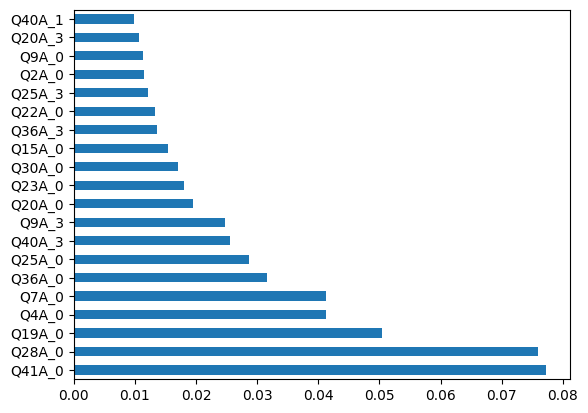

In [38]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(show_top).plot(kind='barh')
plt.show()

In [39]:
# List top 20 features
print(feat_importances.nlargest(show_top))

Q41A_0    0.077220
Q28A_0    0.075974
Q19A_0    0.050335
Q4A_0     0.041341
Q7A_0     0.041231
Q36A_0    0.031633
Q25A_0    0.028705
Q40A_3    0.025644
Q9A_3     0.024759
Q20A_0    0.019582
Q23A_0    0.018097
Q30A_0    0.017121
Q15A_0    0.015366
Q36A_3    0.013701
Q22A_0    0.013375
Q25A_3    0.012172
Q2A_0     0.011503
Q9A_0     0.011402
Q20A_3    0.010621
Q40A_1    0.009881
dtype: float64


Using the not one-hot encoded dataset, fit an Extra-Tree Classifier model and plot a graph of the top 20 features by Gini importance.

In [40]:
# Not one-hot encoded dataset
df = pd.read_csv(os.path.join(data_folder, "data_filtered_1000.csv")) # Using sample dataset.
features = df
labels = df["anxiety_status"]

label_encoder = LabelEncoder()
region = label_encoder.fit_transform(features["region"])
region = pd.DataFrame(region)
region.columns = ["region1"]
features = pd.concat([features, region], axis=1)

features = features.drop(["anxiety_score", "anxiety_status", "country", "agegroup", "continent", "region"], axis=1)
features = features.drop(["gender", "age", "region1"], axis=1)  # Comment this line to include demographics

In [44]:
# Fit a model for questions plus demographics
model = ExtraTreesClassifier()
model.fit(features, labels)
# print(model.feature_importances_) # Use inbuilt class feature_importances of tree based classifiers (Gini importance)

ExtraTreesClassifier()

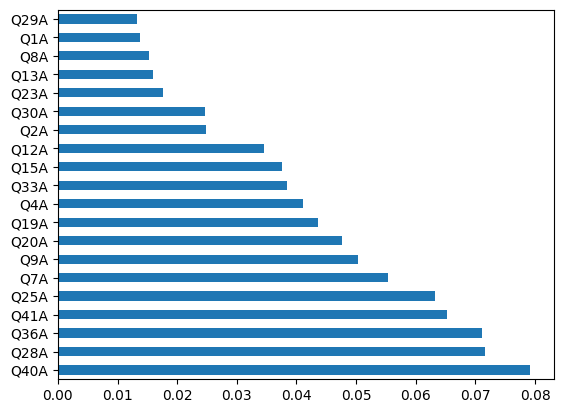

In [42]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(show_top).plot(kind='barh')
plt.show()

In [43]:
# List top 20 features
print(feat_importances.nlargest(show_top))

Q40A    0.079177
Q28A    0.071614
Q36A    0.071028
Q41A    0.065272
Q25A    0.063145
Q7A     0.055294
Q9A     0.050322
Q20A    0.047696
Q19A    0.043589
Q4A     0.041080
Q33A    0.038451
Q15A    0.037587
Q12A    0.034507
Q2A     0.024857
Q30A    0.024715
Q23A    0.017578
Q13A    0.016018
Q8A     0.015204
Q1A     0.013823
Q29A    0.013197
dtype: float64
